In [57]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [2]:
# Import extracted amazon reviews Dataset
#(How to Extract amazon reviews - Refer webscrapping using beautifulsoup(librarie).ipynb)
df=pd.read_csv(r"C:\Users\DELL\Documents\Downloads\Excelr\boatAirdopes-141 Reviews.csv")
df

,id,profileName,text,date,title,rating,images,helpful,Colour,Style name,Pattern name
0,RFQER3Q9NGBMB,Goku,My review is a little bit long(sorry!) but I h...,Reviewed in India 🇮🇳 on 19 January 2022,Good choice (w/ some problems) @999/-,4,https://m.media-amazon.com/images/I/71QBo5jTcZ...,1334,Bold Black,ENx+Beast,Earbuds
1,R3LJ3MMSH7Z1BT,Anindya,"Bought it in January,posting it in August. So ...",Reviewed in India 🇮🇳 on 5 August 2022,Beast in budget!,4,https://m.media-amazon.com/images/I/31QhZYe6gl...,110,Bold Black,ENx+Beast,Earbuds
2,R1XPONNGT8HLBF,Mathew,My review is splited into 6 subpoints:1) The a...,Reviewed in India 🇮🇳 on 11 September 2022,Overall A good budget earpods.,4,NaN,7,Pure White,ENx+Beast,Earbuds
3,RO13Z2QTKACCI,Affan ahmed,Bang for the buck.A solid case and the buds ar...,Reviewed in India 🇮🇳 on 8 September 2022,Bang for the buck!,4,https://m.media-amazon.com/images/I/51ccaQ5Htn...,14,Cyan Cider,ENx+Beast,Earbuds
4,RPYZX0CFFJI72,Jacob angami,I read the negative comments first and decided...,Reviewed in India 🇮🇳 on 13 August 2022,Fake negative reviews.,4,NaN,83,Pure White,ENx+Beast,Earbuds
5,RN2D22H0MNWON,Praveen1908E,"Pros:1. The level of volume it gets to, is jus...",Reviewed in India 🇮🇳 on 1 August 2022,BEST For music! Totally worth it Edit: Not wor...,3,https://m.media-amazon.com/images/I/61BlOWA3Ud...,3,Cyan Cider,ENx+Beast,Earbuds
6,R25FW0UXHA5J7F,Moonmoon M.,This is the best airpods that I have ever used...,Reviewed in India 🇮🇳 on 15 September 2022,God level airpods,4,NaN,0,Cyan Cider,ENx+Beast,Earbuds
7,R2RGB00TTWQCPW,Kiran Gaikwad,I Claim Warranty After Six Month Beacause My r...,Reviewed in India 🇮🇳 on 10 September 2022,"Warranty Claim Is Just For a Fun , Warranty Is...",4,NaN,0,Cyan Cider,ENx+Beast,Earbuds
8,R3S4QD2E704BW3,Ankush,A solid case and the buds are designed in a wa...,Reviewed in India 🇮🇳 on 11 September 2022,Heading : Bang for the buck.,4,NaN,0,Bold Black,ENx+Beast,Earbuds
9,R1WB7KASFN89TY,Suhani,It is decent in quality but the case can be li...,Reviewed in India 🇮🇳 on 9 September 2022,Reviewing this after 1 month,4,https://m.media-amazon.com/images/I/81VO7YFqE2...,1,Cyan Cider,ENx+Beast,Earbuds


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50 non-null     object
 1   profileName   50 non-null     object
 2   text          50 non-null     object
 3   date          50 non-null     object
 4   title         50 non-null     object
 5   rating        50 non-null     int64 
 6   images        13 non-null     object
 7   helpful       50 non-null     int64 
 8   Colour        49 non-null     object
 9   Style name    49 non-null     object
 10  Pattern name  49 non-null     object
dtypes: int64(2), object(9)
memory usage: 4.4+ KB


In [4]:
dfnew=df.drop(columns=['id','profileName','date','images'])

In [5]:
dfnew

,text,title,rating,helpful,Colour,Style name,Pattern name
0,My review is a little bit long(sorry!) but I h...,Good choice (w/ some problems) @999/-,4,1334,Bold Black,ENx+Beast,Earbuds
1,"Bought it in January,posting it in August. So ...",Beast in budget!,4,110,Bold Black,ENx+Beast,Earbuds
2,My review is splited into 6 subpoints:1) The a...,Overall A good budget earpods.,4,7,Pure White,ENx+Beast,Earbuds
3,Bang for the buck.A solid case and the buds ar...,Bang for the buck!,4,14,Cyan Cider,ENx+Beast,Earbuds
4,I read the negative comments first and decided...,Fake negative reviews.,4,83,Pure White,ENx+Beast,Earbuds
5,"Pros:1. The level of volume it gets to, is jus...",BEST For music! Totally worth it Edit: Not wor...,3,3,Cyan Cider,ENx+Beast,Earbuds
6,This is the best airpods that I have ever used...,God level airpods,4,0,Cyan Cider,ENx+Beast,Earbuds
7,I Claim Warranty After Six Month Beacause My r...,"Warranty Claim Is Just For a Fun , Warranty Is...",4,0,Cyan Cider,ENx+Beast,Earbuds
8,A solid case and the buds are designed in a wa...,Heading : Bang for the buck.,4,0,Bold Black,ENx+Beast,Earbuds
9,It is decent in quality but the case can be li...,Reviewing this after 1 month,4,1,Cyan Cider,ENx+Beast,Earbuds


In [6]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [7]:
cleaned_df = df.text.apply(clean)
cleaned_df

0     my review is a little bit longsorry but i have...
1     bought it in januaryposting it in august so iv...
2     my review is splited into   the audio gets dis...
3     bang for the bucka solid case and the buds are...
4     i read the negative comments first and decided...
5      the level of volume it gets to is just awesom...
6     this is the best airpods that i have ever used...
7     i claim warranty after six month beacause my r...
8     a solid case and the buds are designed in a wa...
9     it is decent in quality but the case can be li...
10    good for android not so good with ubuntu micno...
11    excellent sound quality and compatibility the ...
12    i am writing a true review after around a week...
13    this is not a review for the sake of it im wri...
14    i have read a lot of review about this airpode...
15    the quality of the ear buds are very good but ...
16    its a money worth product but youdont expect l...
17    sound and everything is good but the only 

In [8]:
#Word frequency
freq = pd.Series(' '.join(cleaned_df).split()).value_counts()[:20] # for top 20
freq

the     166
is      147
it      102
to       99
and      96
a        92
for      90
you      75
of       73
i        70
in       66
but      62
good     54
with     49
on       49
not      48
this     47
if       44
are      40
its      38
dtype: int64

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
cleaned_df = cleaned_df.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [10]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(cleaned_df).split()).value_counts()[:20] # for top 20
freq_Sw

good            54
battery         34
quality         34
case            32
use             30
sound           28
hours           26
one             26
charge          20
product         20
also            18
airdopes        17
cancellation    16
volume          16
time            15
bass            15
charging        13
dont            13
noise           13
would           13
dtype: int64

In [11]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(cleaned_df)
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [12]:
word_freq_df.head(30)

,term,occurrences,frequency
0,able,4,0.001627
1,abruptly,1,0.000407
2,absent,1,0.000407
3,absolute,1,0.000407
4,accept,1,0.000407
5,accidentally,1,0.000407
6,according,2,0.000813
7,accurate,1,0.000407
8,acompany,1,0.000407
9,active,2,0.000813


In [13]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(cleaned_df)
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [14]:
df

,able,abruptly,absent,absolute,accept,accidentally,according,accurate,acompany,active,...,youd,youdont,youi,youll,younow,youre,youthe,youtuber,youtubers,zero
0,0.000000,0.053491,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.059472,0.000000,0.000000,0.00000,0.059472,0.000000
2,0.119346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.094511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.109043,...,0.000000,0.000000,0.00000,0.218085,0.000000,0.201718,0.120577,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.08582,0.00000,0.000000,...,0.000000,0.000000,0.08582,0.000000,0.000000,0.000000,0.000000,0.08582,0.000000,0.000000
5,0.045706,0.000000,0.000000,0.000000,0.058311,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.052733,0.000000,0.048775,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.16205,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.205279,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.189873,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [15]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [16]:
top2_words = get_top_n2_words(cleaned_df, n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,sound quality,15
1,noise cancellation,11
2,battery life,8
3,charging case,6
4,battery backup,6


[Text(0, 0, 'sound quality'),
 Text(1, 0, 'noise cancellation'),
 Text(2, 0, 'battery life'),
 Text(3, 0, 'charging case'),
 Text(4, 0, 'battery backup'),
 Text(5, 0, 'one side'),
 Text(6, 0, 'quality good'),
 Text(7, 0, 'good enough'),
 Text(8, 0, 'full charge'),
 Text(9, 0, 'value money'),
 Text(10, 0, 'around hours'),
 Text(11, 0, 'good battery'),
 Text(12, 0, 'listen music'),
 Text(13, 0, 'price range'),
 Text(14, 0, 'hours battery'),
 Text(15, 0, 'build quality'),
 Text(16, 0, 'double tap'),
 Text(17, 0, 'next song'),
 Text(18, 0, 'also good'),
 Text(19, 0, 'latency lag')]

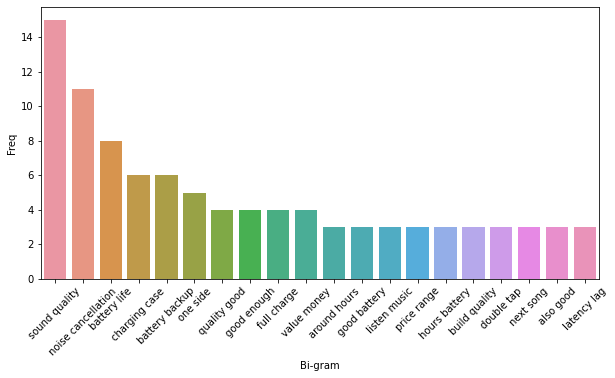

In [17]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [18]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [19]:
top3_words = get_top_n3_words(cleaned_df, n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [20]:
top3_df

,Tri-gram,Freq
0,sound quality bass,3
1,hours around hours,2
2,good battery life,2
3,pain ears long,2
4,huge hours battery,2
...,...,...
195,unpair itdo probably,1
196,itdo probably disconnecting,1
197,probably disconnecting one,1
198,one side bud,1


[Text(0, 0, 'sound quality bass'),
 Text(1, 0, 'hours around hours'),
 Text(2, 0, 'good battery life'),
 Text(3, 0, 'pain ears long'),
 Text(4, 0, 'huge hours battery'),
 Text(5, 0, 'solid case buds'),
 Text(6, 0, 'case buds designed'),
 Text(7, 0, 'buds designed way'),
 Text(8, 0, 'designed way dont'),
 Text(9, 0, 'way dont feel'),
 Text(10, 0, 'dont feel pain'),
 Text(11, 0, 'massive battery charge'),
 Text(12, 0, 'battery charge time'),
 Text(13, 0, 'charge time stays'),
 Text(14, 0, 'time stays quite'),
 Text(15, 0, 'stays quite whilebass'),
 Text(16, 0, 'quite whilebass excellent'),
 Text(17, 0, 'whilebass excellent bassvolume'),
 Text(18, 0, 'excellent bassvolume extraordinary'),
 Text(19, 0, 'bassvolume extraordinary top')]

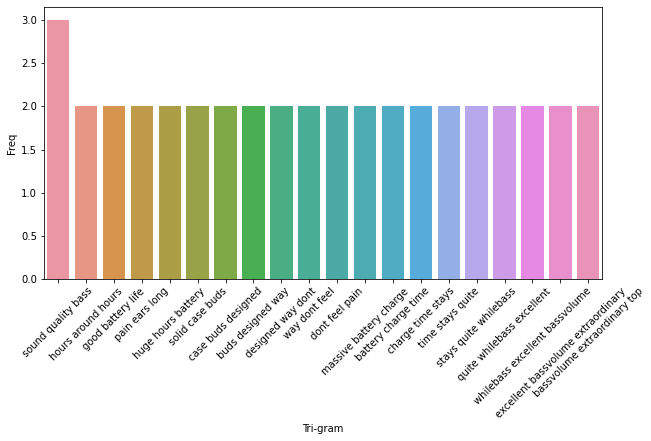

In [21]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [22]:
string_Total = " ".join(cleaned_df)

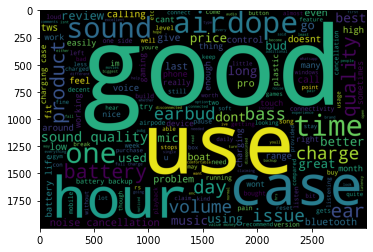

In [23]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 3000,
                height = 2000
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [24]:
with open(r"C:\Users\DELL\Documents\Downloads\Excelr\positive-words.txt") as pos:
    positive=pos.read().split("\n")

In [25]:
positive_words=positive[35:]

In [26]:
positive_tweet=" ".join([word for word in df if word in positive_words])
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(positive_tweet)

In [27]:
with open (r"C:\Users\DELL\Documents\Downloads\Excelr\negative-words.txt") as neg:
    negative=neg.read().split("\n")
negative_words=negative[35:]  

In [28]:
negative_tweets=" ".join([word for word in df if word in negative_words])

In [29]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(negative_tweets)

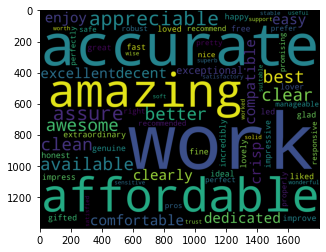

In [30]:
plt.imshow(pos_wordcloud)

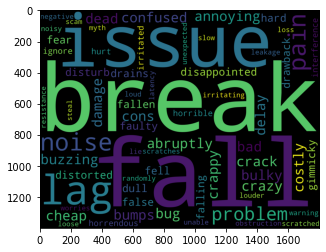

In [31]:
plt.imshow(neg_wordcloud)

In [32]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=string_Total
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [33]:
for token in doc_block[100:200]:
    print(token,token.pos_)  

say VERB
light ADJ
rather ADV
negligiblerange NOUN
walls NOUN
betweeni NOUN
charged VERB
battery NOUN
first ADJ
time NOUN
try VERB
charge NOUN
increase NOUN
charging VERB
cycles NOUN
confused VERB
charge NOUN
apparently ADV
better ADJ
charge NOUN
soon ADV
do AUX
nt PART
need VERB
good ADJ
battery NOUN
life NOUN
also ADV
avoid VERB
going VERB
many ADJ
variants NOUN
believe VERB
need VERB
earbuds NOUN
normal ADJ
use NOUN
bestand PROPN
one NUM
thing NOUN
do AUX
nt PART
forget VERB
check VERB
whether SCONJ
airdopes NOUN
come VERB
plastic NOUN
sealed VERB
box NOUN
sealed VERB
plastic ADJ
high ADJ
chance NOUN
returned VERB
product NOUN
may AUX
may AUX
good VERB
one NUM
right ADJ
factory NOUN
productprob NOUN
sound NOUN
abruptly ADV
reduced VERB
getting VERB
earlier ADJ
volume NOUN
level NOUN
became VERB
volume NOUN
levelprob NOUN
pair NOUN
connecting VERB
ie PROPN
opening NOUN
casenow PROPN
deciding VERB
return NOUN
product NOUN
last ADJ
day NOUN
suddenly ADV
remembered VERB
troubleshooting 

In [34]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['sound', 'reduced', 'getting', 'volume', 'level', 'became', 'volume', 'levelprob', 'pair', 'connecting', 'opening', 'deciding', 'return', 'product', 'day', 'remembered', 'troubleshooting', 'manual', 'tried', 'followingsolutionunpair', 'pair', 'reset', 'want', 'itdo', '👆', '👆', '👆', 'disconnecting', 'side', 'bud', 'volume', 'level', 'reset', 'become', 'issue', 'getting', 'functioning', 'took', 'care', 'dropped', 'handled', 'charged', 'airdopes', 'perfected', 'use', 'notice', 'time', 'time', 'problem', 'reset', 'decide', 'purchase', 'knowing', 'hope', 'helps', 'finding', 'review', 'purchase', 'based', 'review', 'variants', 'range', 'feature', 'noticed', 'interferencebuzzing', 'keeping', 'buzzing', 'irritating', 'noise', 'comes', 'known', 'brand', 'budgetupdate', 'months', 'pair', 'working', 'noticed', 'battery', 'time', 'charge', 'use', 'day', 'charging', 'case', 'charge', 'remember', 'day', 'use', 'days', 'noticed', 'using', 'generate', 'pain', 'ears', 'mean', 'hours', 'use', 'studying

In [35]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,battery,34
1,quality,34
2,case,32
3,use,30
4,hours,26
5,charge,20
6,product,20
7,sound,18
8,airdopes,17
9,volume,16


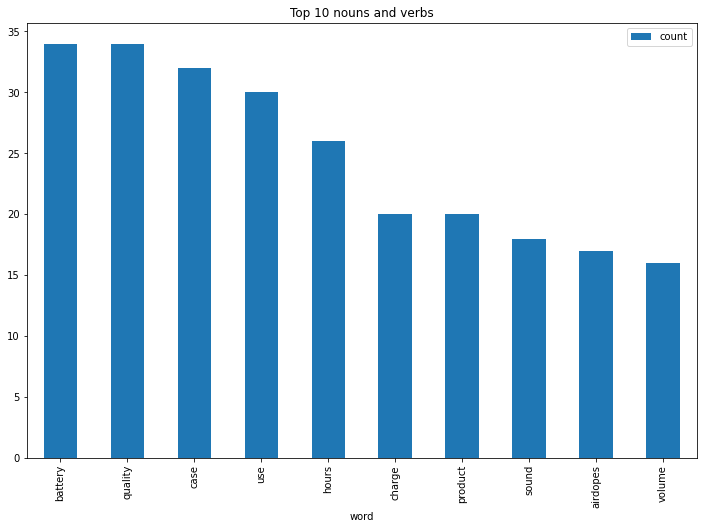

In [36]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [39]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(cleaned_df))
sentences

['review little bit longsorry shared genuine experience days use help decide whether want notreview read review last day return thisi loved airdopes tested batteries days use doesnt seem problem till reviews problem related charging battery backupi casual user music listener video watcher simply besti previously encountered electrical interference latest launched earbuds present thesealso feel ears really soft used throughout day greatnow bass quite also mm driver good low frequency sounds minor loss nothing seriousat assure boat service year also great battery backupearbuds hrcase times chargednot hours around hours overallnot fit enjoy gaming hardcore gamers great casual gamingenc present would say light rather negligiblerange walls betweeni charged battery first time try charge increase charging cycles confused charge apparently better charge soon dont need good battery life also avoid going many variants believe need earbuds normal use bestand one thing dont forget check whether ai

In [47]:
len(cleaned_df)

50

In [48]:
rev={"review":cleaned_df}

In [49]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [50]:
review_data

,review
0,review little bit longsorry shared genuine experience days use help decide whether want notreview read review last day return thisi loved airdopes tested batteries days use doesnt seem problem till reviews problem related charging battery backupi casual user music listener video watcher simply besti previously encountered electrical interference latest launched earbuds present thesealso feel ears really soft used throughout day greatnow bass quite also mm driver good low frequency sounds minor loss nothing seriousat assure boat service year also great battery backupearbuds hrcase times chargednot hours around hours overallnot fit enjoy gaming hardcore gamers great casual gamingenc present would say light rather negligiblerange walls betweeni charged battery first time try charge increa...
1,bought januaryposting august ive used almost months giving honest reviewin short getting sale time steal dealalso regular price bw good productsound quality good enough loud volume bass also ok mic quality descent indoor conditionbut noisy environment cant rely recevier cant clearly listen gaming company claiming low latencyi didnt test itnow battery backupcompany claim give battery backup hours case hours single chargeadditional times charge via case practical use gives total hours playbackit give around hours backup single charge buds volumeif listen music watching videobut call gaming charge earbuds full times via case additional hours gaming used call wont last long total playback time additional hours around hours listen music watch video volumejust one side pointed many people de...
2,review splited audio gets distorted sometimes listening many medias audio range meters obstruction battery backup along charging case around hrs depending upon usage use one earpod time instead two two around noice cancellation hardly exists surrounding sounds still mic decent enc pretty good however would liked dedicated command button turn could able record small sounds needed imposed build quality average considering features give price point considered good product considered
3,bang bucka solid case buds designed way dont feel pain earspros battery massive battery charge time stays quite whilebass excellent bassvolume extraordinary top notchcons connectivity distance issues phone different room wont able connect buds youll move closer noise cancellation youre looking forward buy earbuds active noise cancellation isnt youthe left earbud gets disconnected every youll manually put case open gets connected ownconclusion preference watch movies listen music daily basis go youre actively travelling looking noise cancellation buds could use travelling product isnt
4,read negative comments first decided buy comments said gives high latency gaming like pubg also falls ear running difference normal beast mode slightly differencebut pubg youtuber recommended decided give try trying myselflet provide facts youi boat rockerz headphone obviously better airdope airdope surprised better providing accurate sound pubgits days used daily hours full charge buttons works touch sensor impressive pubg doesnt give delay written comments good latency better expected negative commentssometimes though faced issue one side airdope stops working either standby without detecting user bug included faqguidehelp card box im satisfied terms gamingfor sports like running wouldnt recommend slips away however maybe u tie airdope thread attached ur neck safe landing ground im g...
5,level volume gets awesome get incredibly loud youre gym awesome noise cancellation great simply put without even music playing u wont able hear things around u well great places like lovely battery life ive week charge case minutes earbuds leave case five min youll getting battery long long comfortable used long periods touch controls responsive tap pause double tap right one next song double tap left one either rewind previous song also pick calls multiple ear coverings provided type c sound qualit

In [51]:
text=" ".join(review_data)

In [52]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [53]:
review_data

,review
0,review little bit longsorry shared genuine experience days use help decide whether want notreview read review last day return thisi loved airdopes tested batteries days use doesnt seem problem till reviews problem related charging battery backupi casual user music listener video watcher simply besti previously encountered electrical interference latest launched earbuds present thesealso feel ears really soft used throughout day greatnow bass quite also mm driver good low frequency sounds minor loss nothing seriousat assure boat service year also great battery backupearbuds hrcase times chargednot hours around hours overallnot fit enjoy gaming hardcore gamers great casual gamingenc present would say light rather negligiblerange walls betweeni charged battery first time try charge increa...
1,bought januaryposting august ive used almost months giving honest reviewin short getting sale time steal dealalso regular price bw good productsound quality good enough loud volume bass also ok mic quality descent indoor conditionbut noisy environment cant rely recevier cant clearly listen gaming company claiming low latencyi didnt test itnow battery backupcompany claim give battery backup hours case hours single chargeadditional times charge via case practical use gives total hours playbackit give around hours backup single charge buds volumeif listen music watching videobut call gaming charge earbuds full times via case additional hours gaming used call wont last long total playback time additional hours around hours listen music watch video volumejust one side pointed many people de...
2,review splited audio gets distorted sometimes listening many medias audio range meters obstruction battery backup along charging case around hrs depending upon usage use one earpod time instead two two around noice cancellation hardly exists surrounding sounds still mic decent enc pretty good however would liked dedicated command button turn could able record small sounds needed imposed build quality average considering features give price point considered good product considered
3,bang bucka solid case buds designed way dont feel pain earspros battery massive battery charge time stays quite whilebass excellent bassvolume extraordinary top notchcons connectivity distance issues phone different room wont able connect buds youll move closer noise cancellation youre looking forward buy earbuds active noise cancellation isnt youthe left earbud gets disconnected every youll manually put case open gets connected ownconclusion preference watch movies listen music daily basis go youre actively travelling looking noise cancellation buds could use travelling product isnt
4,read negative comments first decided buy comments said gives high latency gaming like pubg also falls ear running difference normal beast mode slightly differencebut pubg youtuber recommended decided give try trying myselflet provide facts youi boat rockerz headphone obviously better airdope airdope surprised better providing accurate sound pubgits days used daily hours full charge buttons works touch sensor impressive pubg doesnt give delay written comments good latency better expected negative commentssometimes though faced issue one side airdope stops working either standby without detecting user bug included faqguidehelp card box im satisfied terms gamingfor sports like running wouldnt recommend slips away however maybe u tie airdope thread attached ur neck safe landing ground im g...
5,level volume gets awesome get incredibly loud youre gym awesome noise cancellation great simply put without even music playing u wont able hear things around u well great places like lovely battery life ive week charge case minutes earbuds leave case five min youll getting battery long long comfortable used long periods touch controls responsive tap pause double tap right one next song double tap left one either rewind previous song also pick calls multiple ear coverings provided type c sound qualit

In [54]:
text=" ".join(review_data["review"])

In [55]:
text

'review little bit longsorry shared genuine experience days use help decide whether want notreview read review last day return thisi loved airdopes tested batteries days use doesnt seem problem till reviews problem related charging battery backupi casual user music listener video watcher simply besti previously encountered electrical interference latest launched earbuds present thesealso feel ears really soft used throughout day greatnow bass quite also mm driver good low frequency sounds minor loss nothing seriousat assure boat service year also great battery backupearbuds hrcase times chargednot hours around hours overallnot fit enjoy gaming hardcore gamers great casual gamingenc present would say light rather negligiblerange walls betweeni charged battery first time try charge increase charging cycles confused charge apparently better charge soon dont need good battery life also avoid going many variants believe need earbuds normal use bestand one thing dont forget check whether air

In [58]:
text_tokens = word_tokenize(text)

In [59]:
text_tokens

['review',
 'little',
 'bit',
 'longsorry',
 'shared',
 'genuine',
 'experience',
 'days',
 'use',
 'help',
 'decide',
 'whether',
 'want',
 'notreview',
 'read',
 'review',
 'last',
 'day',
 'return',
 'thisi',
 'loved',
 'airdopes',
 'tested',
 'batteries',
 'days',
 'use',
 'doesnt',
 'seem',
 'problem',
 'till',
 'reviews',
 'problem',
 'related',
 'charging',
 'battery',
 'backupi',
 'casual',
 'user',
 'music',
 'listener',
 'video',
 'watcher',
 'simply',
 'besti',
 'previously',
 'encountered',
 'electrical',
 'interference',
 'latest',
 'launched',
 'earbuds',
 'present',
 'thesealso',
 'feel',
 'ears',
 'really',
 'soft',
 'used',
 'throughout',
 'day',
 'greatnow',
 'bass',
 'quite',
 'also',
 'mm',
 'driver',
 'good',
 'low',
 'frequency',
 'sounds',
 'minor',
 'loss',
 'nothing',
 'seriousat',
 'assure',
 'boat',
 'service',
 'year',
 'also',
 'great',
 'battery',
 'backupearbuds',
 'hrcase',
 'times',
 'chargednot',
 'hours',
 'around',
 'hours',
 'overallnot',
 'fit',
 '

In [60]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [61]:
tf=TfidfVectorizer()

In [62]:
text_tf=tf.fit_transform(text_without_sw)

In [63]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [64]:
df

,abruptly,absent,absolute,accept,accidentally,accurate,acompany,active,actively,actualy,...,youd,youdont,youi,youll,younow,youre,youthe,youtuber,youtubers,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
words_list=" ".join(df)

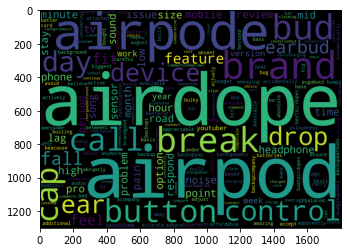

In [66]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

In [68]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,review little bit longsorry shared genuine experience days use help decide whether want notreview read review last day return thisi loved airdopes tested batteries days use doesnt seem problem till reviews problem related charging battery backupi casual user music listener video watcher simply besti previously encountered electrical interference latest launched earbuds present thesealso feel ears really soft used throughout day greatnow bass quite also mm driver good low frequency sounds minor loss nothing seriousat assure boat service year also great battery backupearbuds hrcase times chargednot hours around hours overallnot fit enjoy gaming hardcore gamers great casual gamingenc present would say light rather negligiblerange walls betweeni charged battery first time try charge increa...,0.480570,0.102581
1,bought januaryposting august ive used almost months giving honest reviewin short getting sale time steal dealalso regular price bw good productsound quality good enough loud volume bass also ok mic quality descent indoor conditionbut noisy environment cant rely recevier cant clearly listen gaming company claiming low latencyi didnt test itnow battery backupcompany claim give battery backup hours case hours single chargeadditional times charge via case practical use gives total hours playbackit give around hours backup single charge buds volumeif listen music watching videobut call gaming charge earbuds full times via case additional hours gaming used call wont last long total playback time additional hours around hours listen music watch video volumejust one side pointed many people de...,0.517593,0.138299
2,review splited audio gets distorted sometimes listening many medias audio range meters obstruction battery backup along charging case around hrs depending upon usage use one earpod time instead two two around noice cancellation hardly exists surrounding sounds still mic decent enc pretty good however would liked dedicated command button turn could able record small sounds needed imposed build quality average considering features give price point considered good product considered,0.613333,0.272500
3,bang bucka solid case buds designed way dont feel pain earspros battery massive battery charge time stays quite whilebass excellent bassvolume extraordinary top notchcons connectivity distance issues phone different room wont able connect buds youll move closer noise cancellation youre looking forward buy earbuds active noise cancellation isnt youthe left earbud gets disconnected every youll manually put case open gets connected ownconclusion preference watch movies listen music daily basis go youre actively travelling looking noise cancellation buds could use travelling product isnt,0.543750,0.172222
4,read negative comments first decided buy comments said gives high latency gaming like pubg also falls ear running difference normal beast mode slightly differencebut pubg youtuber recommended decided give try trying myselflet provide facts youi boat rockerz headphone obviously better airdope airdope surprised better providing accurate sound pubgits days used daily hours full charge buttons works touch sensor impressive pubg doesnt give delay written comments good latency better expected negative commentssometimes though faced issue one side airdope stops working either standby without detecting user bug included faqguidehelp card box im satisfied terms gamingfor sports like running wouldnt recommend slips away however maybe u tie airdope thread attached ur neck safe landing ground im g...,0.538667,0.277167
5,level volume gets awesome get incredibly loud youre gym awesome noise cancellation great simply put without even music playing u wont able hear things around u well great places like lovely battery life ive week charge case minutes earbuds leave case five min youll getting battery long long comfortable used long periods touch controls responsive tap pause double tap right one next song dou

In [69]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,review little bit longsorry shared genuine experience days use help decide whether want notreview read review last day return thisi loved airdopes tested batteries days use doesnt seem problem till reviews problem related charging battery backupi casual user music listener video watcher simply besti previously encountered electrical interference latest launched earbuds present thesealso feel ears really soft used throughout day greatnow bass quite also mm driver good low frequency sounds minor loss nothing seriousat assure boat service year also great battery backupearbuds hrcase times chargednot hours around hours overallnot fit enjoy gaming hardcore gamers great casual gamingenc present would say light rather negligiblerange walls betweeni charged battery first time try charge increa...,0.480570,0.102581,Positive
1,bought januaryposting august ive used almost months giving honest reviewin short getting sale time steal dealalso regular price bw good productsound quality good enough loud volume bass also ok mic quality descent indoor conditionbut noisy environment cant rely recevier cant clearly listen gaming company claiming low latencyi didnt test itnow battery backupcompany claim give battery backup hours case hours single chargeadditional times charge via case practical use gives total hours playbackit give around hours backup single charge buds volumeif listen music watching videobut call gaming charge earbuds full times via case additional hours gaming used call wont last long total playback time additional hours around hours listen music watch video volumejust one side pointed many people de...,0.517593,0.138299,Positive
2,review splited audio gets distorted sometimes listening many medias audio range meters obstruction battery backup along charging case around hrs depending upon usage use one earpod time instead two two around noice cancellation hardly exists surrounding sounds still mic decent enc pretty good however would liked dedicated command button turn could able record small sounds needed imposed build quality average considering features give price point considered good product considered,0.613333,0.272500,Positive
3,bang bucka solid case buds designed way dont feel pain earspros battery massive battery charge time stays quite whilebass excellent bassvolume extraordinary top notchcons connectivity distance issues phone different room wont able connect buds youll move closer noise cancellation youre looking forward buy earbuds active noise cancellation isnt youthe left earbud gets disconnected every youll manually put case open gets connected ownconclusion preference watch movies listen music daily basis go youre actively travelling looking noise cancellation buds could use travelling product isnt,0.543750,0.172222,Positive
4,read negative comments first decided buy comments said gives high latency gaming like pubg also falls ear running difference normal beast mode slightly differencebut pubg youtuber recommended decided give try trying myselflet provide facts youi boat rockerz headphone obviously better airdope airdope surprised better providing accurate sound pubgits days used daily hours full charge buttons works touch sensor impressive pubg doesnt give delay written comments good latency better expected negative commentssometimes though faced issue one side airdope stops working either standby without detecting user bug included faqguidehelp card box im satisfied terms gamingfor sports like running wouldnt recommend slips away however maybe u tie airdope thread attached ur neck safe landing ground im g...,0.538667,0.277167,Positive
5,level volume gets awesome get incredibly loud youre gym awesome noise cancellation great simply put without even music playing u wont able hear things around u well great places like lovely battery life ive week charge case minutes earbuds leave case five min youll getting battery long long comfortable used long periods touch controls r

In [70]:
review_data['analysis'].value_counts()

Positive    46
Neutral      2
Negative     2
Name: analysis, dtype: int64

In [71]:
#positive comments
(168/280)*100

60.0

In [72]:
#negative comments
(112/280)*100

40.0